In [1]:
%load_ext autoreload
%autoreload 2
print("rip")

rip


In [2]:
# Get rid of warnings (!)
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 

# Import all the deep learning stuff
# import tensorflow as tf
# import keras
# from tensorflow.keras import layers
from sklearn.model_selection import train_test_split


# Import all the math and analysis stuff
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Import script for loading gestures
from datatools.data_process import load_preprocessed_data_split_on_candidate, load_candadite_map, divide_cand_split

In [ ]:
print(f"Training size: {len(X_train)} Testing size: {len(X_test)}")

NameError: name 'X_train' is not defined

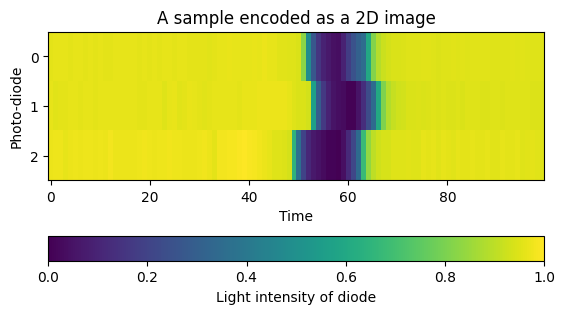

{'timestamp': 1684583102.0632234,
 'candidate': 'E5',
 'hand': 'right_hand',
 'gesture_type': 'gestures',
 'target_gesture': 'swipe_right',
 'resistance': 682000,
 'sample_rate': 100,
 'duration': 1.0,
 'samples': 100}

In [33]:
gesture = GestureData.load_samples_for_digit(digit_name=DigitNames.eleven)[1]
gesture.normalize()
data = gesture.data.T



# Calculate the figure size based on pixel size and array dimensions
plt.imshow(data, interpolation='nearest', cmap='viridis')
cbar = plt.colorbar(orientation = 'horizontal')

plt.title('A sample encoded as a 2D image')
plt.xlabel('Time')
plt.ylabel('Photo-diode')
cbar.set_label('Light intensity of diode')




plt.gca().set_aspect(10)


# Add a stroke around the y-axis
# ax.spines['left'].set_visible(True)
# ax.spines['left'].set_color('black')
# plt.subplots_adjust(top = 1.5)


plt.show()
gesture.metadata

# Rest

In [40]:
hand = Hand.right
cand_map = load_candadite_map()
X_train_samples, X_test_samples, y_train, y_test = divide_cand_split(cand_map)

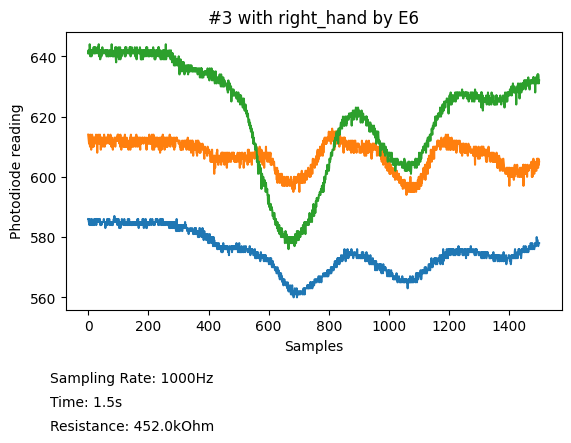

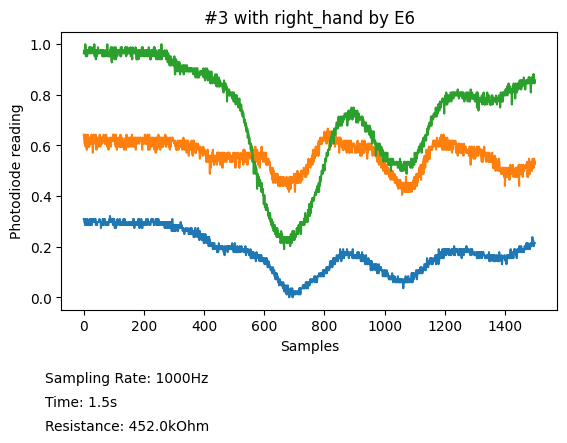

train: 266, test: 97


In [41]:
import random
i = random.randint(0, len(X_train_samples))
X_train_samples[i].plot()

X_train_samples[i].normalize()
X_train_samples[i].plot()
# X_test[i_test].plot()
print(f"train: {i}, test: {i_test}")

 

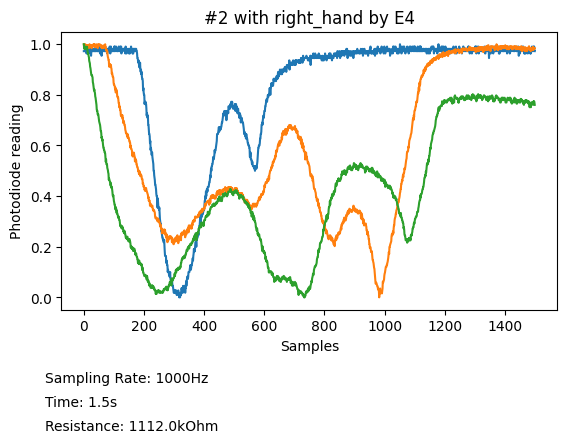

In [54]:
# Test preprocessing.
cand_map = load_candadite_map()
X_train_samples, X_test_samples, y_train, y_test = divide_cand_split(cand_map, test_size=0.1, shuffle=True)
# Preprocessing
for sample in X_train_samples:
    # sample.addPadding(target_size=2000)
    # sample.downsample(freq=100)
    sample.nomalize_seperate_channels()
    # if divide_into_frames: sample.divide_sample_into_frames()
# for sample in X_test_samples:
#     sample.addPadding(target_size=2000)
#     sample.normalize()
#     sample.downsample(freq=100)
#     # if divide_into_frames: sample.divide_sample_into_frames()
import random
i = random.randint(0, len(X_train_samples))
X_train_samples[i].plot()

In [55]:
import tensorflow as tf
import keras

In [58]:
X_train, X_test, y_train, y_test, _ = load_preprocessed_data_split_on_candidate(test_size=0.1, shuffle=True, normalize_per_channel=True, log=True)

Loading preprocessed data and splitting with the following parameters: hand: Hand.right, test_size: 0.1, divide into frames: False, shuffle: True
size of training set: 712
size of test set: 100


In [59]:
model = tf.keras.Sequential()

hidden_nodes = 16
dense_nodes = 10
model.add(keras.layers.Conv2D(128, kernel_size=(3, 1), activation='relu'))
  # Output shape: (198, 3, 128)

  # Final dropout layer
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(dense_nodes, activation='softmax'))
model.compile(optimizer='adam', loss="mse", metrics=["accuracy"])

In [60]:
X_train = X_train.reshape(-1, 200, 3, 1)
history = model.fit(
    X_train, 
    y_train, 
    batch_size=32,
    validation_split=0.1,
    shuffle=True, 
    epochs=200
)

NameError: name 'x_train' is not defined

In [23]:
history.history

{'loss': [0.0411074236035347,
  0.04071985185146332,
  0.03998953849077225,
  0.03856274113059044,
  0.039752889424562454,
  0.03861141949892044,
  0.03821559250354767,
  0.03809013217687607,
  0.036686498671770096,
  0.03841148689389229,
  0.03776966780424118,
  0.0375063493847847,
  0.03743879869580269,
  0.03687315434217453,
  0.0368666872382164,
  0.03553660959005356,
  0.03647061437368393,
  0.036285337060689926,
  0.035370804369449615,
  0.035523224622011185,
  0.03538448363542557,
  0.03492112085223198,
  0.034593693912029266,
  0.03350691869854927,
  0.03355365991592407,
  0.033697422593832016,
  0.03461981192231178,
  0.03397112339735031,
  0.034636225551366806,
  0.03390166908502579,
  0.033902037888765335,
  0.03418904170393944,
  0.03466378524899483,
  0.032223623245954514,
  0.03224065527319908,
  0.03248511999845505,
  0.03255179151892662,
  0.032462626695632935,
  0.03219880536198616,
  0.031847819685935974,
  0.03170160576701164,
  0.03073875606060028,
  0.0316054597496

In [24]:
X_test = X_test.reshape(-1, 200, 3, 1)
test_loss, test_acc = model.evaluate(np.array(X_test), np.array(y_test), verbose=2)

4/4 - 0s - loss: 0.1372 - accuracy: 0.2100 - 242ms/epoch - 60ms/step
